### Income Dataset
### Perform Binary Classification to predict if Salary is greater than $50K 

## Setup

### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import Adam, SGD
import keras_tuner as kt

### Load the dataset

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print("Train dataset shape:", train_data.shape)
print("Test dataset shape:", test_data.shape)

Train dataset shape: (43957, 15)
Test dataset shape: (899, 14)


## Explore features

<h3>Data Columns Explanation</h3>

<ul>
  <li><strong>Age:</strong> Age of the person.</li>
  <li><strong>Workclass:</strong> Categorical variable indicating the type of work, e.g., Government or Private.</li>
  <li><strong>Fnlwgt:</strong> Final weight, a demographic weighting variable.</li>
  <li><strong>Education:</strong> Education level of the person.</li>
  <li><strong>Educational-num:</strong> Education represented as an integer.</li>
  <li><strong>Marital-status:</strong> Marital status of the person.</li>
  <li><strong>Occupation:</strong> Occupation of the person or job title.</li>
  <li><strong>Relationship:</strong> Relationship status of the person.</li>
  <li><strong>Race:</strong> Race of the person.</li>
  <li><strong>Gender:</strong> Gender of the person.</li>
  <li><strong>Capital-gain:</strong> Capital gain.</li>
  <li><strong>Capital-loss:</strong> Capital loss.</li>
  <li><strong>Hours-per-week:</strong> Hours worked per week.</li>
  <li><strong>Native-country:</strong> Native country of the person.</li>
  <li><strong>Income_>50K:</strong> Target column indicating whether the income is greater than $50K.</li>
</ul>


In [3]:
train_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


## Data Cleaning

### Check duplicates & drop them

In [5]:
train_data.duplicated().sum()

45

In [6]:
train_data.drop_duplicates(inplace=True)
train_data.duplicated().sum()

0

In [7]:
test_data.duplicated().sum()

0

### Check null values & fill them

In [8]:
train_data.isnull().sum()

age                   0
workclass          2494
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2502
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [9]:
# Replace missing values in 'workclass' column with mode
workclass_mode = train_data['workclass'].mode()[0]
train_data['workclass'].fillna(workclass_mode, inplace=True)
test_data['workclass'].fillna(workclass_mode, inplace=True)

# Replace missing values in 'occupation' column with mode
occupation_mode = train_data['occupation'].mode()[0]
train_data['occupation'].fillna(occupation_mode, inplace=True)
test_data['occupation'].fillna(occupation_mode, inplace=True)

# Replace missing values in 'native-country' column with mode
native_country_mode = train_data['native-country'].mode()[0]
train_data['native-country'].fillna(native_country_mode, inplace=True)
test_data['native-country'].fillna(native_country_mode, inplace=True)


In [10]:
train_data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [11]:
test_data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

### Cleaning test dataset

In [12]:
#Check for dublicates 
test_data.duplicated().sum()

0

In [13]:
#check for null values 
test_data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

### Check if the data is balanced or not 

(array([33399.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10513.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

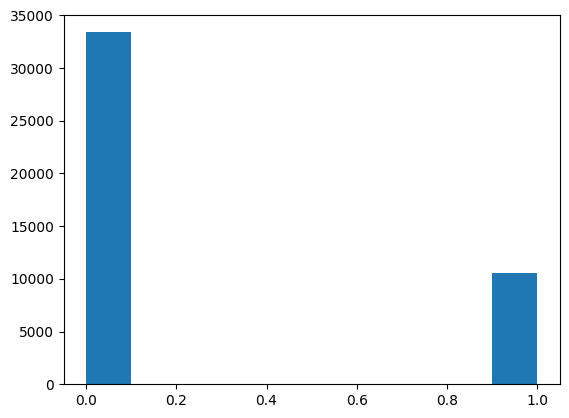

In [14]:
train_data["income_>50K"].value_counts()
mp.hist(train_data["income_>50K"])

### Undersampling

(array([10513.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10513.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

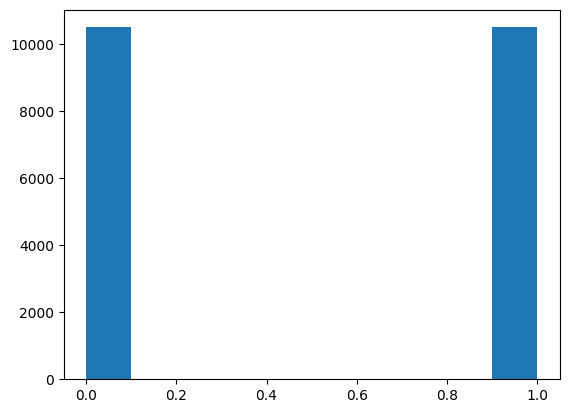

In [15]:
selected_zero_rows = train_data[train_data['income_>50K'] == 0].iloc[:10513].drop(columns='fnlwgt')
selected_one_rows = train_data[train_data['income_>50K'] == 1].iloc[:10513].drop(columns='fnlwgt')
final_data = pd.concat([selected_zero_rows, selected_one_rows])

mp.hist(final_data["income_>50K"])

## Separate `input features` and `target variable`

In [16]:
X = final_data.drop('income_>50K', axis=1)
y = final_data['income_>50K']

## Normalize & encode columns

In [17]:
# train dataset 
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include='number').columns
categorical_cols = X.select_dtypes(include='object').columns

# Normalize numerical columns
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# encode categorical columns
X = pd.get_dummies(X, columns=categorical_cols)
print("Preprocessed dataset:", X.shape)

Preprocessed dataset: (21026, 103)


In [18]:
# test dataset 
test_data.drop(columns='fnlwgt')
# Identify numerical and categorical columns
numerical_cols = test_data.select_dtypes(include='number').columns
categorical_cols = test_data.select_dtypes(include='object').columns

# Normalize numerical columns
scaler = MinMaxScaler()
test_data[numerical_cols] = scaler.fit_transform(test_data[numerical_cols])

# encode categorical columns
test_data = pd.get_dummies(test_data, columns=categorical_cols)
print("Preprocessed dataset:", test_data.shape)
test_data

Preprocessed dataset: (899, 91)


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Nicaragua,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States
0,0.301370,0.365581,0.533333,0.0,0.0,0.391753,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,0.205479,0.121739,0.733333,0.0,0.0,0.412371,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,0.410959,0.252561,0.533333,0.0,0.0,0.391753,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.027397,0.421967,0.466667,0.0,0.0,0.185567,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,0.397260,0.346577,0.533333,0.0,0.0,0.391753,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0.136986,0.336021,0.866667,0.0,0.0,0.546392,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
895,0.000000,0.235213,0.400000,0.0,0.0,0.185567,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
896,0.095890,0.126387,0.600000,0.0,0.0,0.391753,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
897,0.246575,0.133252,0.600000,0.0,0.0,0.391753,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


## Build a network and fintune it

### Splite 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build model

In [20]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(70, activation='relu'),
    Dense(40, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.25)

# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/20


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8658 - loss: 0.2921 - val_accuracy: 0.8088 - val_loss: 0.5244
Epoch 2/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8666 - loss: 0.2920 - val_accuracy: 0.8031 - val_loss: 0.5066
Epoch 3/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8634 - loss: 0.2923 - val_accuracy: 0.8064 - val_loss: 0.5320
Epoch 4/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8640 - loss: 0.2937 - val_accuracy: 0.8059 - val_loss: 0.5236
Epoch 5/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8684 - loss: 0.2862 - val_accuracy: 0.8088 - val_loss: 0.5635
Epoch 6/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8647 - loss: 0.2912 - val_accuracy: 0.8117 - val_loss: 0.5589
Epoch 7/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8640 - loss: 0.2886 - val_accuracy: 0.8045 - val_loss: 0.5858
Epoch 8/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8713 - loss: 0.2857 - val_accuracy: 0.8040 - val_

### What Optimizer is best

In [ ]:
best_accuracy = 0
best_optimizer = ''

# Perform grid search for both 'adam' and 'sgd' optimizers
for optimizer in ['adam', 'sgd']:
    # Compile the model with the current optimizer
    opt = Adam() if optimizer == 'adam' else SGD()
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_split=0.25)

    # Evaluate the model on test set
    loss, accuracy = model.evaluate(X_test, y_test)

    # Update best optimizer if needed
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_optimizer = optimizer

# Print the best optimizer and accuracy
print("Best Optimizer:", best_optimizer)
print("Best Accuracy:", best_accuracy)


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8217 - loss: 0.4453
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8196 - loss: 0.4679
Best Optimizer: adam
Best Accuracy: 0.812173068523407
